# Hierarchical clustering

#### Libraries

In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## Goals of this lecture
 
- Review: **unsupervised learning**. 
- Conceptual introduction to **hierarchical clustering**.
- Hierarchical clustering with `sklearn`.

## Review: Unsupervised approaches

Broadly, statistical modeling approaches can be either:

- **Supervised**: learn from some function $f$ mapping **features** to **labels** ($Y$) $X$ t$Y$.  
- **Unsupervised**: learning some function $f$ finding structure in **features**, *without* labels.

So far, all the models we've discussed (regression, decision trees, SVMs), have been *supervised*.

### Review: Why unsupervised learning?

> In [**unsupervised learning**](https://en.wikipedia.org/wiki/Unsupervised_learning), a model learns patterns from unlabeled data.

This is useful for a few reasons:

- It's **practical**: doesn't require defining or acquiring *labels* for data.
- It's **conceptually interesting**: humans (arguably) don't have direct, supervised feedback.
   - Labels or categories often **emerge** from exposure to data––they don't exist *a priori*.
- It's **helpful**: unsupervised approaches help identify *structure* in a dataset. 
   - Useful for **exploratory data analysis**.
   - With techniques like PCA, also helps **reduce dimensionality**.

### Review: the challenge of unsupervised learning

Supervised learning is straightforward:

- Clear *goal*: predict $Y$ from $X$.  
- Clear *evaluation metric*: how well did we predict $Y$?

Unsupervised learning is harder to define:

- What is our **goal**?
- How do we **check our work**?

### Review: why it's useful! 

Despite these challenges, unsupervised learning is of *growing importance* to computational researchers.

Many examples of its use:

- Clustering *cells* on their *gene expressions* to identify different **cancer subtypes**. 
- Identify *groups* of shoppers based on *shopping habits* to develop different **advertising schemes**. 
- Clustering *word uses* (e.g., "river bank" vs. "financial bank") to identify **distinct meanings**. 

#### Check-in

Does anyone remember a kind of clustering we discussed in CSS 2, and how it works?

### Review: K-means clustering

> [**K-means clustering**](https://en.wikipedia.org/wiki/K-means_clustering) is a clustering approach that aims to partition $n$ observations into $k$ *non-overlapping* clusters.

Ideally, we would like to do this in a way that **minimizes** within-cluster variation.

$$\frac{1}{n}*\sum_i(x_i - \bar{x_i})^2$$

Basic intuition:

- A "good" cluster is one with low variance.  
- A "bad" cluster is one which has high variance.

### Review: the $K$-means algorithm

There are many ways to partition $n$ points into $k$ groups. 

The $K$-means algorithm gives us a **"local optimum"**––not perfect, but pretty good.

- Start by determining desired number of clusters ($k$). 
- Then, randomly assign each observation to a random cluster $k$.
- Now, iterate until the cluster assignment stops changing...
   - For each cluster $k$, compute the **centroid** (the mean)
   - Assign each observation to the cluster whose centroid is *closest* (using Euclidean distance).

After many **iterations**, this algorithm converges onto a locally optimal solution.

### Review: $K$-means, illustrated

<img src="img/kmeans.png" width="500" alt="Illustration of K-means clustering">


### Review: limitations of $K$-means

- One major limitation is that **we must specify the number of clusters ahead of time**!
   - Determining the optimal $K$ is itself a challenging empirical and theoretical problem.
   - Can use methods like *elbow method*, *silhouette analysis*, and more.
   - But ultimately a somewhat arbitrary decision.
- Other approaches, such as *hierarchical clustering*, don't have this limitation.

## Hierarchical clustering

> **Hierarchical clustering** is an alternative clustering approach in which observations are iteratively (hierarchically) joined together into clusters, forming a "tree" structure (or **dendrogram**).

- Start by forming *pairs* of observations.
- Then group those pairs into larger *clusters*.
- Then join those clusters, until you've joined all your points.

In the end, this will form a **hierarchical tree-like structure**.

### What is a *dendrogram*?

> A **dendrogram** is a visual representation of the results of hierarchical clustering, showing the order in which pairs of points/clusters were joined.

- Each **leaf** (at the bottom of the dendrogram) is a point.
- The "height" at which two points/clusters were joined is their similarity.
- We can "cut" the dendrogram at different heights, determining the final number of clusters.

<img src="img/dendrogram_example.png" width="500" alt="Dendrogram comparison">


### Interpreting a dendrogram

- The **height** at which two points are joined reflects their proximity in the original feature-space.
  - E.g., `1` and `6` are close, so they are joined early on.
  - E.g., `5` and `7` are close, so they are joined early on.
- But proximity on the dendrogram doesn't necessarily reflect proximity in the original feature-space! Height is what matters.
  E.g., points like `2` and `9` are close on the dendrogram, but are connected quite *high up*.

<img src="img/dendrogram_with_points.png" width="500" alt="Dendrogram with scatterplot">


### So how do we *build* the dendrogram?

Let's start with the basic intuition:

- **Step 1**: Calculate the *dissimilarity* between every pair of points.
   - E.g., [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).
- **Step 2**: Join the *most similar* (*least dissimilar*) pairs into clusters.
- **Step 3**:
   - Now, until you've joined *every* cluster together...
   - ...recursively join those clusters into ever-larger clusters, defined by their similarity.

Can anyone think of a challenge with step 3?


### Linkage: comparing *groups* of points

- Calculating **dissimilarity** between individual points is straightforward.
- But we also need a way to calculate the dissimilarity between **groups of points**.

> **Linkage** defines the dissimilarity between groups of points, and can be operationalized in different ways.

|Linkage Type|Description|
|------------|------------|
|Complete|Maximal inter-cluster similarity, i.e., *maximum distance* across all pairs of points across two clusters.|
|Single|Minimal inter-cluster similarity, i.e., *minimum distance* across all pairs of points across two clusters.|
|Average|Average inter-cluster similarity, i.e., *average distance* across all pairs of points across two clusters.|
|Centroid|Dissimilarity between *centroids* of clusters.|


### Hierarchical clustering, illustrated

- This plot illustrates hierarchical clustering using **complete linkage** and **Euclidean distance**.
- First, join (`5`, `7`); then join (`6`, `1`).
- Then group `(5, 7)` with `8`.


<img src="img/hierarchical_clustering_illustrated.png" width="400" alt="Hierarchical clustering in action">



### Which linkage is best?

- The same data will be clustered in different ways depending on which *linkage* is used.
- "Single" linkage often results in trailing clusters fused one at a time, and is generally less balanced than average or complete linkage.

<img src="img/linkage.png" width="500" alt="Comparison of different linkage techniques">


### Which dissimilarity measure?

- Often, researchers use **Euclidean distance**.
- For a 2-dimensional feature-space, that is defined as follows:

$$d(p, q) = \sqrt{(p_1-q_1)^2 - (p_2-q_2)^2}$$
  
- But other metrics, like the **correlation** between two points, can be used.
   - E.g., points may be *distant*, but have *similar vectors*.
- Must also consider whether to first **scale** your points (e.g., $z$-score).

### Revisiting the hierarchical clustering algorithm

Now that we have a better understanding of the components, we can elaborate on our **hierarchical clustering algorithm**.

- **Step 1**: First, compute the dissimilarity between points.
   - Can use `Euclidean distance`, `correlation`, etc.
- **Step 2**: Now, until all points have been joined, repeat...
   - Select your `linkage` type.
   - Join the points (or groups of points) that are closest, according to `linkage` type.
   - Stop when all groups have been joined.
- **Step 3 (optional)**: "Cut" the dendrogram at a given *height* to determine number of clusters.

### How to validate your clusters?

- A huge challenge in unsupervised clustering is **validating** clusters.
- If you already have labeled data, you can ask whether the **clustering approach** yields labels that correspond to the ground truth.
- But typically, we don't have labels——that's why we're using clustering!
- So we can also rely on metrics like the average amount of variance per cluster, etc.

## Hierarchical clustering in practice

- We can implement hierarchical clustering using `scipy.cluster.linkage`.
- We can then plot this using `scipy.cluster.dendrogram`.

(Note: This can also be done using `AgglomerativeClustering` in `sklearn`.)

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram

### A sample dataset

To start, let's return to our `iris` dataset.

In [4]:
df_iris = pd.read_csv("data/classification/iris.csv")
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
### Data
X = df_iris[['sepal length (cm)', "petal width (cm)"]].values
X.shape

(150, 2)

#### Step 1: Compute dissimilarity matrix

- Our first step is to compute the **dissimilarity** between every pair of points.
- Let's use the *Euclidean distance*.
- A quick way to do this is using `pdist`, which calculates the *pairwise distances* between observations.
  - By default, this is called a **condensed matrix**, which is what we want to pass to `linkage`.

In [6]:
from scipy.spatial.distance import pdist, squareform

In [7]:
### Compute matrix
dissimilarity_matrix = pdist(X, 'euclidean')
dissimilarity_matrix.shape

(11175,)

#### Why this shape?

- Given $n$ observations, there are ${n \choose 2}$ pairs.
- So for `150` observations, there are `11175` pairs.

#### Detour: visualizing dissimilarity matrix

- We can first use `squareform`: converts a distance vector to a square-form distance matrix.
  - Useful for visualizing.
- We can visualize the dissimilarity between every pair of pionts using `sns.heatmap`. 

In [8]:
from scipy.spatial.distance import squareform
square_matrix = squareform(dissimilarity_matrix)

### Square matrix is 150x150
square_matrix.shape

(150, 150)

<Axes: >

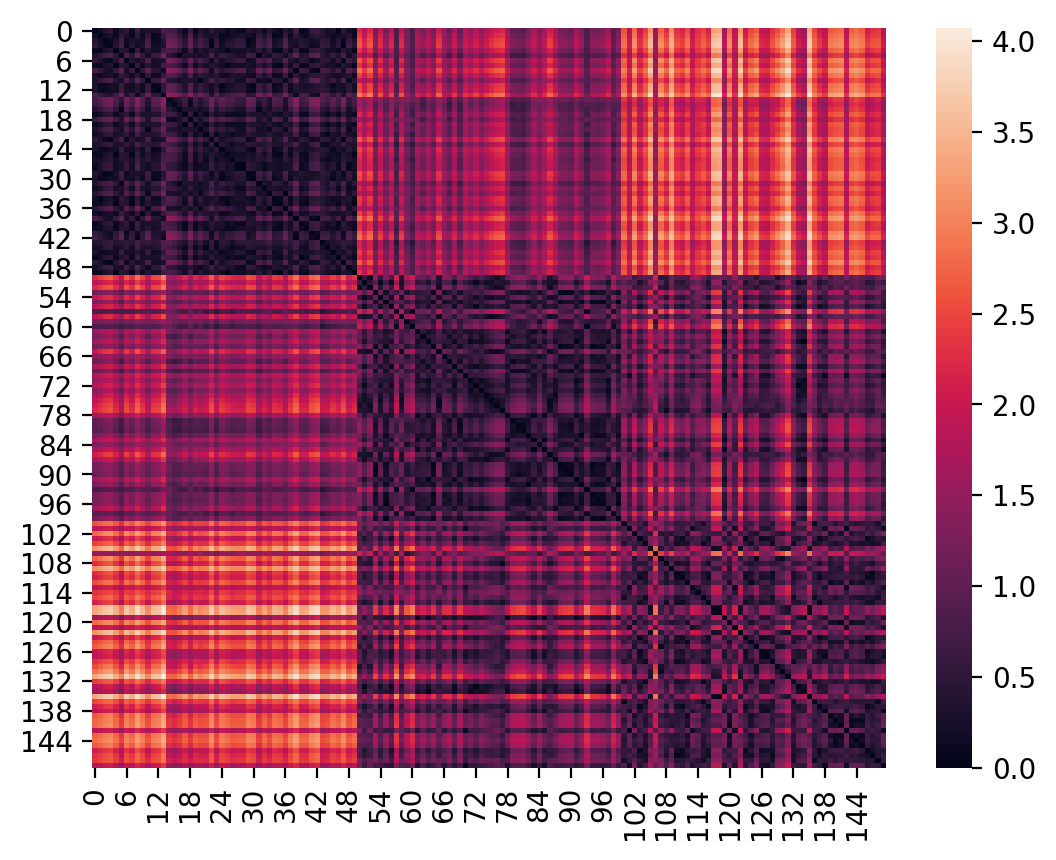

In [9]:
sns.heatmap(square_matrix)

#### Step 2: Apply `linkage`

- The `linkage` method takes in a **condensed distance matrix**, 

In [10]:
linkage_matrix = linkage(dissimilarity_matrix, method='average')
linkage_matrix.shape

(149, 4)

In [11]:
### What do you think these columns mean?
linkage_matrix[0]

array([ 0., 39.,  0.,  2.])

#### Understanding the output of `linkage`

- For $n$ datapoints, `linkage` will return $n-1$ rows (clusters).
- Each row represents a **merge** operation.
- In terms of the *columns*:
   - First two columns list *indices* of points/clusters merged at each step.
      - For *points*, represents index of point in original distribution.
      - For *clusters*, starts at $n$.
   - Third column records *distance* between those points/clusters.
   - Fourth column shows number of original observations contains in newly formed cluster.

Text(0.5, 0, 'Distance')

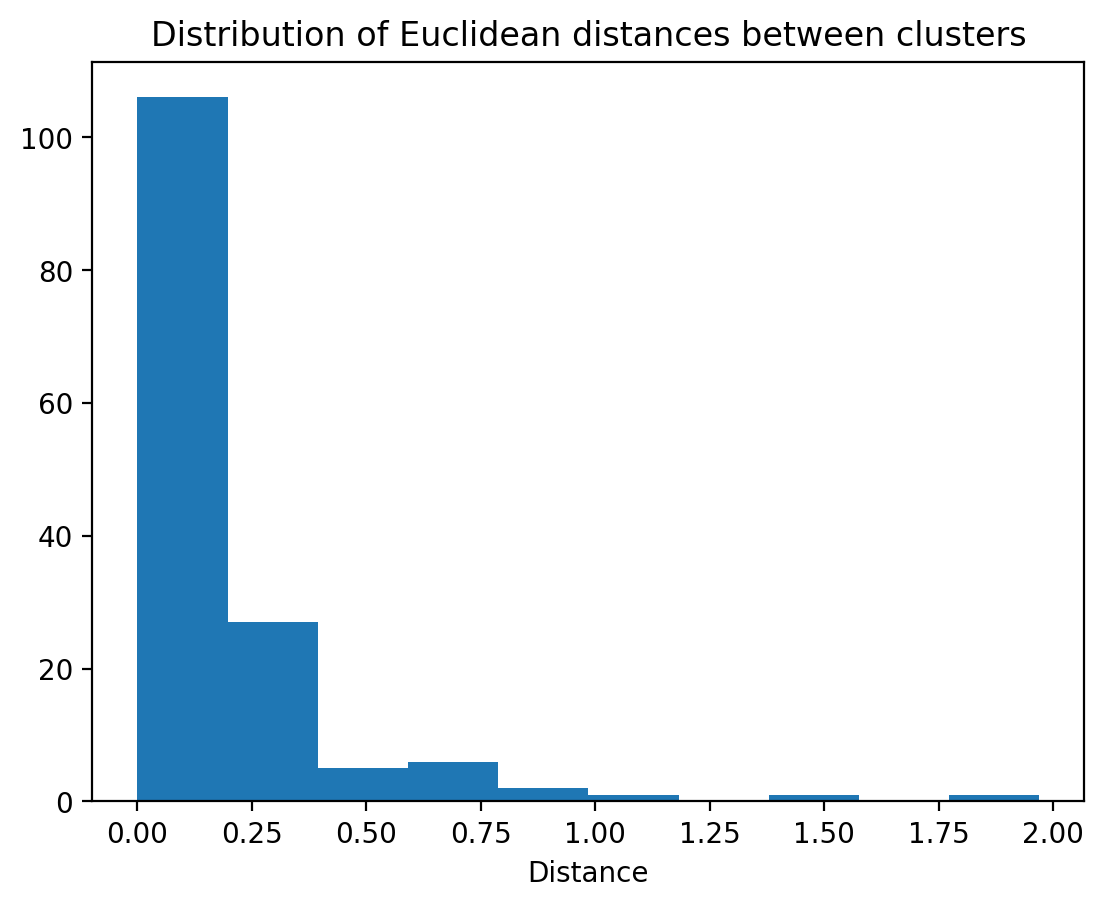

In [12]:
plt.hist(linkage_matrix[:,2])
plt.title("Distribution of Euclidean distances between clusters")
plt.xlabel("Distance")

#### Step 3: Visualizing our `dendrogram`

- We can pass `linkage_matrix` to the `dendrogram` function.
- The `color_threshold` determines the *height* at which to "cut" clusters.

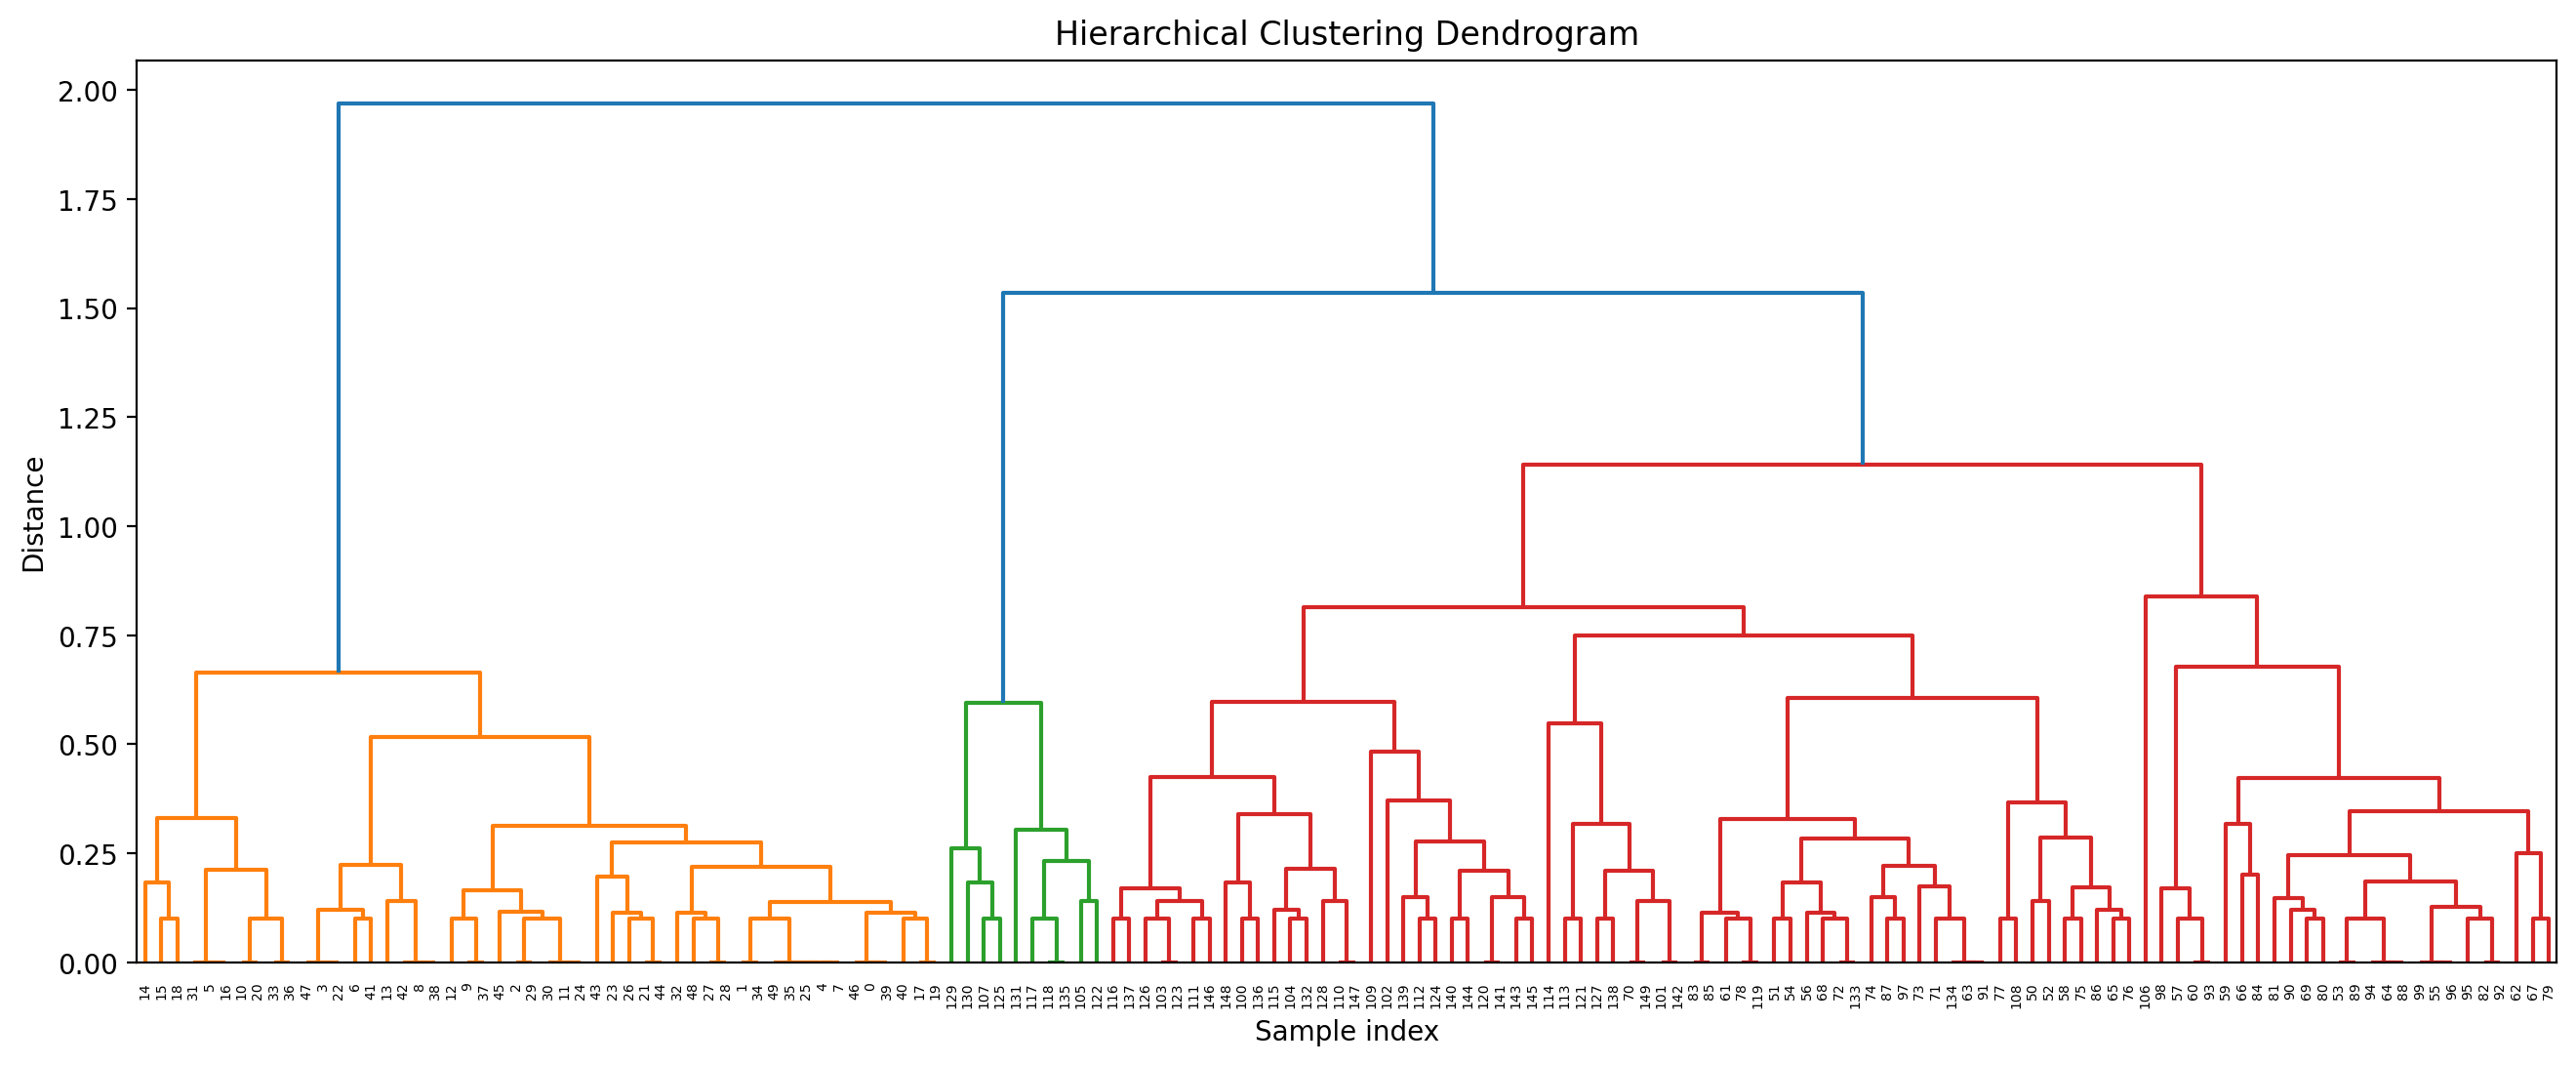

In [13]:
# Plot the dendrogram
plt.figure(figsize=(16, 6))
dendrogram(linkage_matrix, color_threshold=1.5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#### Step 4: Extracting clusters

- Once we have a `linkage` matrix, we can estimate **cluster labels** using `fcluster` (flat cluster).
- This is useful if you want to extract some kind of **discrete cluster label**, and is usually based on the underlying `distance` (though other criteria can be used).
- These can be compared to the *ground truth*.
  - (Though this is kind of complicated, because the labels may not correspond correctly.)

In [14]:
from scipy.cluster.hierarchy import fcluster

### Can determine distance threhsold
clusters = fcluster(linkage_matrix, 1.25, criterion='distance')
clusters.shape

(150,)

#### Step 5: Visualizing clusters

- We can **visualize** the results of our clustering algorithm on top of the original points.

<Axes: >

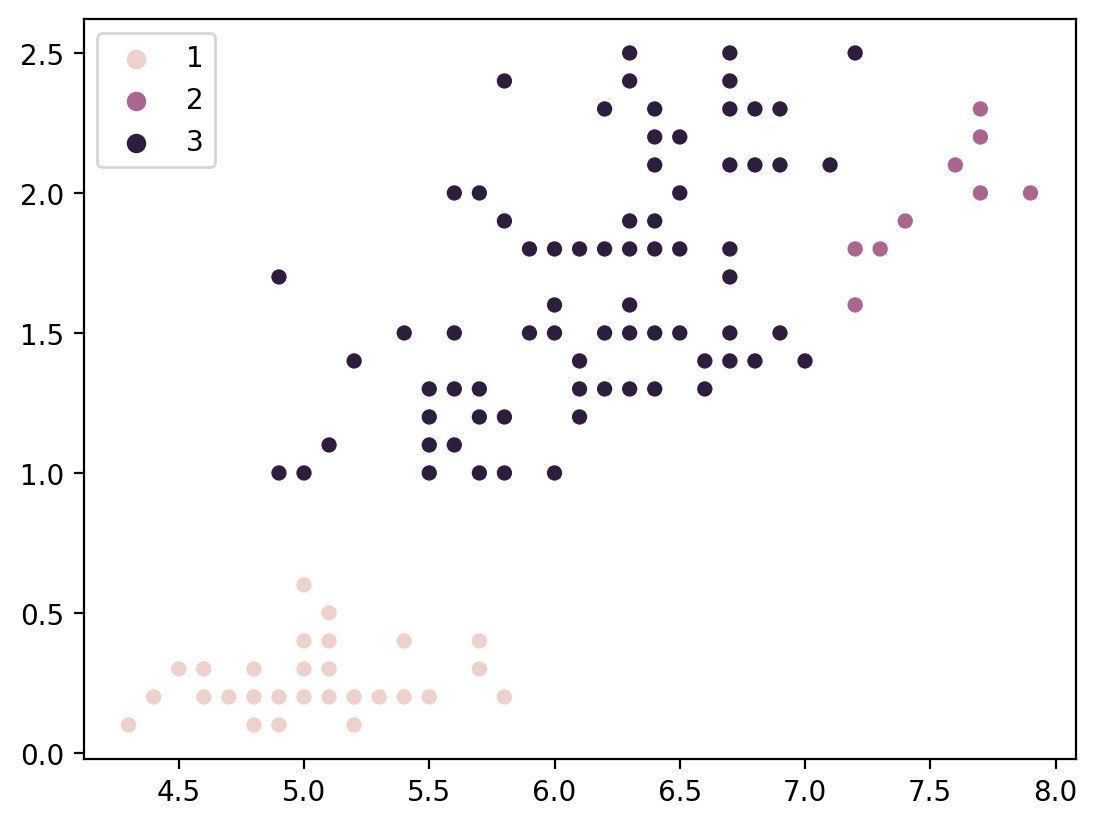

In [15]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = clusters)

### Key considerations

- The choice of `metric` matters.
   - If using `scipy`, can parameterize this in `pdist`.
- The choice of `linkage` also matters!
- In some cases, researchers will also **scale** data before clustering.
- The **number of clusters** is determined by where you "cut" the dendrogram.
  - If possible, it's also useful to **validate** final clusters against the ground truth.

## Lecture wrap-up

- Hierarchical clustering is a useful approach to extracting structure from data.
- Basic intuition:
  - Compute **pairwise distance** between all points (dissimilarity matrix).
  - Iteratively **join points** (using a **linkage** algorithm) to form clusters.
  - Repeat this until all points have been unified.
